# Lasso Regression on Gapminder dataset

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

plt.style.use('ggplot')

In [31]:
df = pd.read_csv('datasets/gm_2008_region.csv')

X = df.drop(['Region','life'], axis=1).values
y = df['life'].values

In [32]:
lasso = Lasso(alpha=0.4, normalize=True)

lasso.fit(X, y)

lasso_coef = lasso.coef_
print(lasso_coef)

[-0.         -0.         -0.          0.          0.          0.
 -0.         -0.07087587]


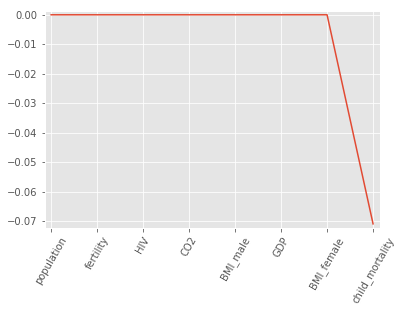

In [33]:
colnames = df.drop(['Region','life'], axis=1).columns
plt.plot(range(len(colnames)), lasso_coef)
plt.xticks(range(len(colnames)), colnames.values, rotation=60)
plt.margins(0.02);

# Ridge Regression: Alpha and $R^2$
Lasso is great for feature selection, but when building regression models, Ridge regression should be your first choice

We'll see how $R^2$ score varies with different alphas

In [35]:
alpha_space = np.logspace(-4, 0, 50)

def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

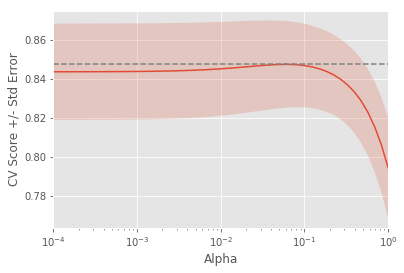

In [36]:
ridge_scores = []
ridge_scores_std = []

ridge = Ridge(normalize=True)

for alpha in alpha_space:
    # specify alpha value on the regressor
    ridge.alpha = alpha
    
    # perform 10-fold CV
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    ridge_scores.append(np.mean(ridge_cv_scores))
    ridge_scores_std.append(np.std(ridge_cv_scores))
    
display_plot(ridge_scores, ridge_scores_std)

In [42]:
idx = np.argmax(ridge_scores)
print('Max accuracy: {}'.format(ridge_scores[idx]))
print('alpha: {}'.format(alpha_space[idx]))

Max accuracy: 0.8474139143663143
alpha: 0.05963623316594643
